# Chapter 3 - Mini session
# 피처 스케일러 비교

- Standard Scaler
- Min-Max Scaler
- Robust Scaler

## Libraries

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Iris Dataset

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## DF to NumPy Array

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Distribution of Original Features

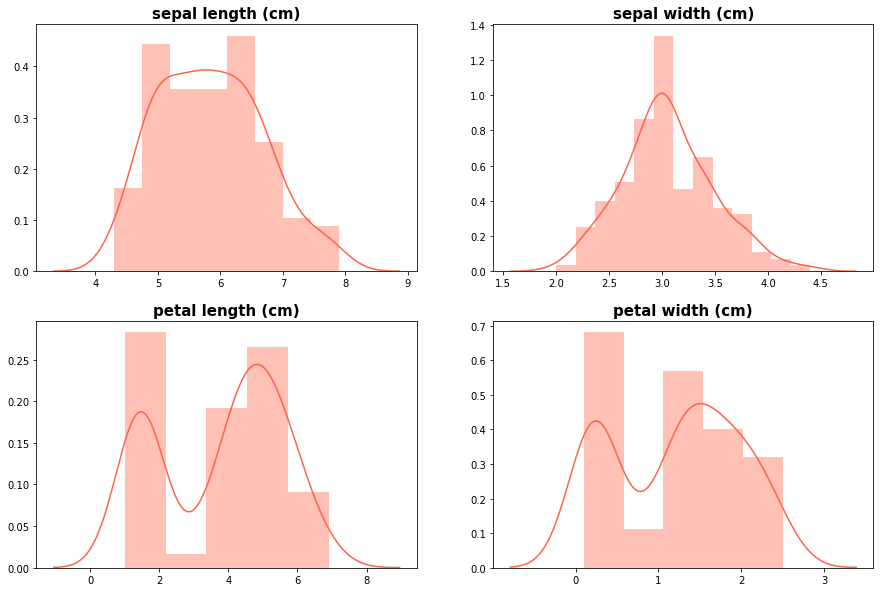

In [4]:
plt.figure(figsize = (15,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(df.columns[i], size=15, weight='bold')
    sns.distplot(X[:,i], color='tomato')
plt.show()

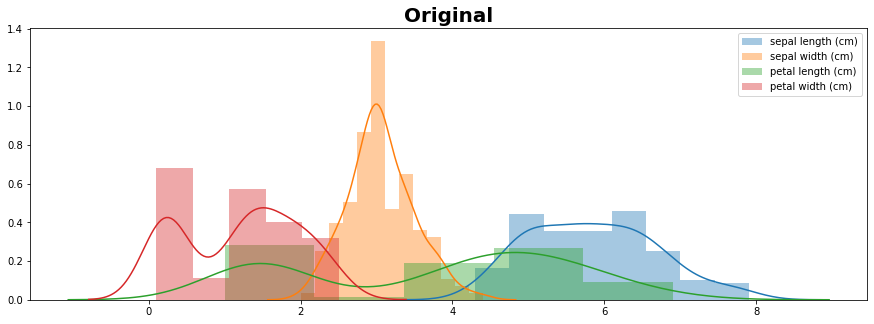

In [5]:
plt.figure(figsize=(15,5))
for i in range(4):
    plt.title('Original', size=20, weight='bold')
    sns.distplot(X[:,i], label='{}'.format(df.columns[i]))
    plt.legend(loc='upper right')
plt.show()

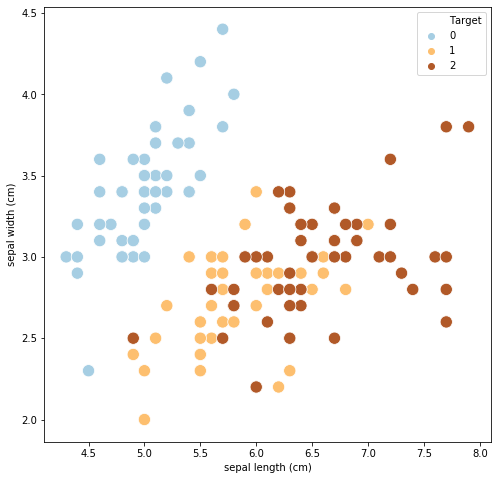

In [6]:
df_org = pd.DataFrame(X[:,0:2], columns=iris.feature_names[0:2])
df_org['Target'] = iris.target

plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="Target", palette="Paired", s=150, data=df_org)
plt.show()

## Standard Scaler

- 평균이 0, 표준편차가 1이 되도록 변환.

$$
Z = {X-\mu \over \sigma}
$$

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_ss = ss.transform(X)

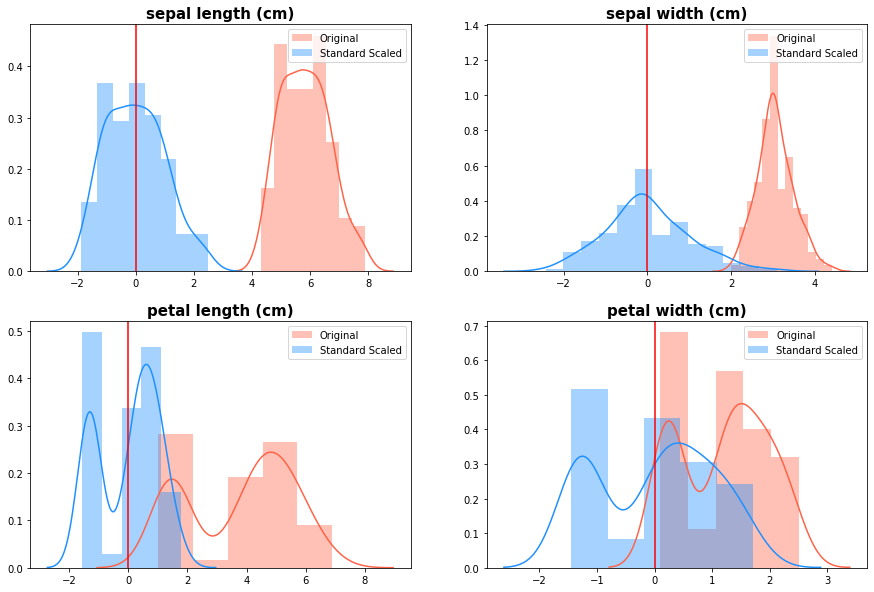

In [8]:
plt.figure(figsize = (15,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.grid(False)
    plt.title(df.columns[i], size=15, weight='bold')
    sns.distplot(X[:,i], color='tomato', label='Original')
    sns.distplot(X_ss[:,i], color='dodgerblue', label='Standard Scaled')
    plt.axvline(0, color='r')
    plt.legend(loc='upper right')
plt.show()

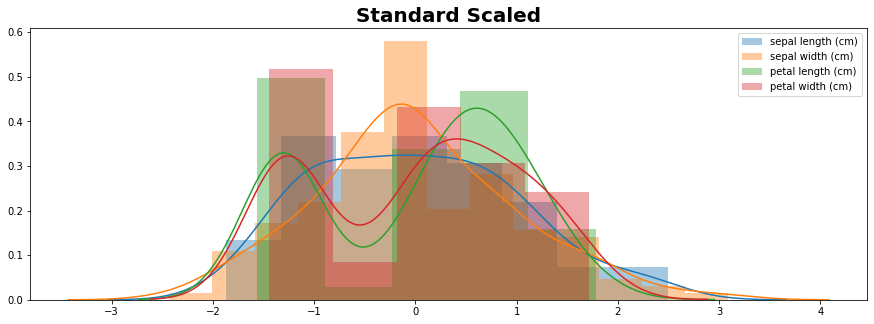

In [9]:
plt.figure(figsize=(15,5))
for i in range(4):
    plt.title('Standard Scaled', size=20, weight='bold')
    sns.distplot(X_ss[:,i], label='{}'.format(df.columns[i]))
    plt.legend(loc='upper right')
plt.show()

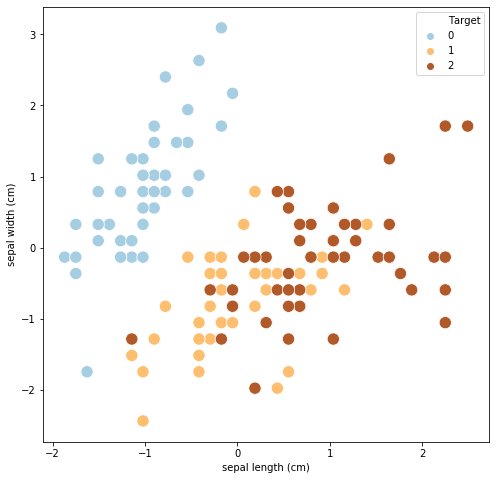

In [10]:
df_ss = pd.DataFrame(X_ss[:,0:2], columns=iris.feature_names[0:2])
df_ss['Target'] = iris.target

plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="Target", palette="Paired", s=150, data=df_ss)
plt.show()

## Min-Max Scaler

- 최댓값이 1, 최솟값이 0이 되도록 변환.  

$$
Z = {{X - min(X)} \over {} max(X) - min(X)}
$$

In [11]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(X)
X_ms = ms.transform(X)

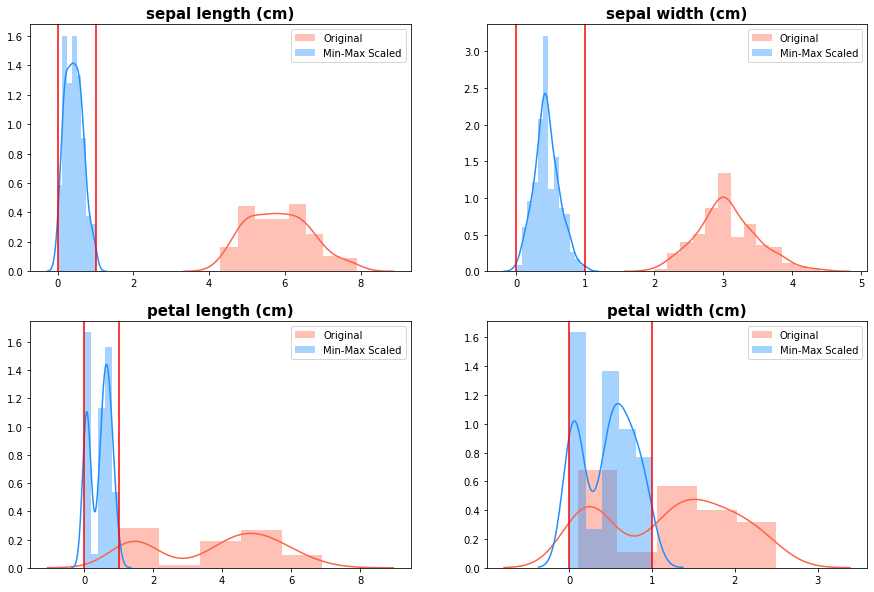

In [12]:
plt.figure(figsize = (15,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.grid(False)
    plt.title(df.columns[i], size=15, weight='bold')
    sns.distplot(X[:,i], color='tomato', label='Original')
    sns.distplot(X_ms[:,i], color='dodgerblue', label='Min-Max Scaled')
    plt.axvline(0, color='r')
    plt.axvline(1, color='r')
    plt.legend(loc='upper right')
plt.show()

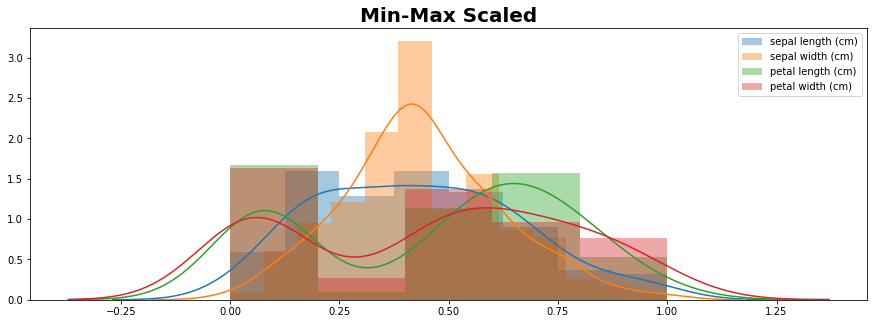

In [13]:
plt.figure(figsize=(15,5))
for i in range(4):
    plt.title('Min-Max Scaled', size=20, weight='bold')
    sns.distplot(X_ms[:,i], label='{}'.format(df.columns[i]))
    plt.legend(loc='upper right')
plt.show()

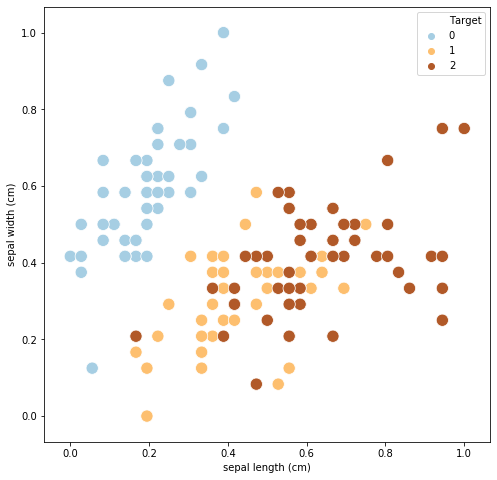

In [14]:
df_ms = pd.DataFrame(X_ms[:,0:2], columns=iris.feature_names[0:2])
df_ms['Target'] = iris.target

plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="Target", palette="Paired", s=150, data=df_ms)
plt.show()

## Robust Scaler

- 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.  
- IQR(Inter Quartile Range) : 25분위수와 75분위수 사이의 거리  
- 아웃라이어의 영향을 줄이는 효과.

$$
Z = {{X - Q_{1}(X)} \over IQR(X)} ={{X - Q_{1}(X)} \over {Q_{3}(X) - {Q_{1}(X)}}}
$$

In [15]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(X)
X_rs = rs.transform(X)

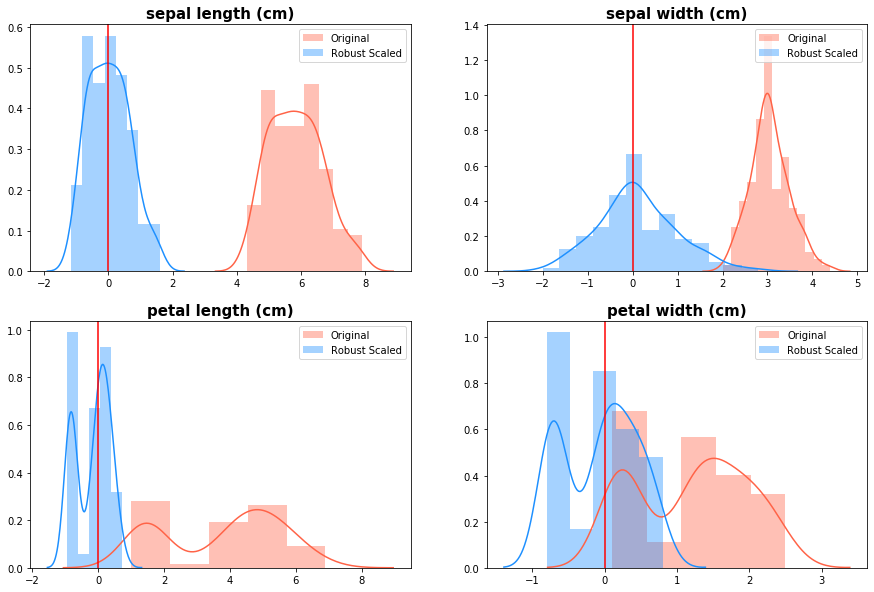

In [16]:
plt.figure(figsize = (15,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.grid(False)
    plt.title(df.columns[i], size=15, weight='bold')
    sns.distplot(X[:,i], color='tomato', label='Original')
    sns.distplot(X_rs[:,i], color='dodgerblue', label='Robust Scaled')
    plt.axvline(0, color='r')
    plt.legend(loc='upper right')
plt.show()

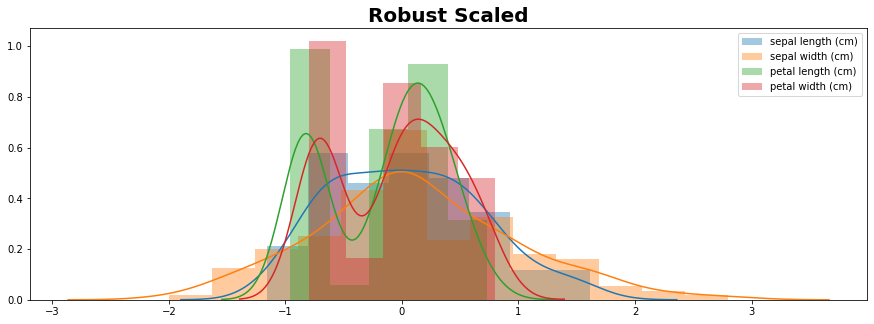

In [17]:
plt.figure(figsize=(15,5))
for i in range(4):
    plt.title('Robust Scaled', size=20, weight='bold')
    sns.distplot(X_rs[:,i], label='{}'.format(df.columns[i]))
    plt.legend(loc='upper right')
plt.show()

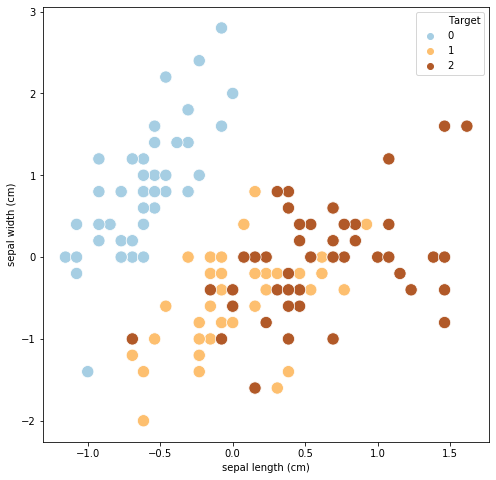

In [18]:
df_rs = pd.DataFrame(X_rs[:,0:2], columns=iris.feature_names[0:2])
df_rs['Target'] = iris.target

plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="Target", palette="Paired", s=150, data=df_rs)
plt.show()

## Outliers?

In [19]:
np.random.seed(1)
a = np.random.randn(200)
a = a.reshape(-1,1)

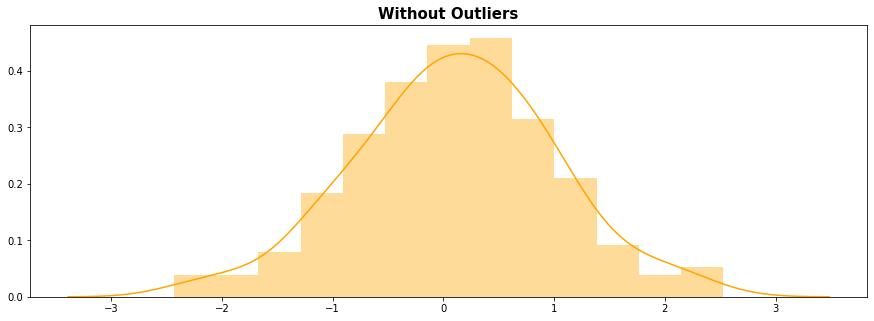

In [20]:
plt.figure(figsize=(15,5))
plt.title('Without Outliers',size=15, weight='bold')
sns.distplot(a, color='orange')
plt.show()

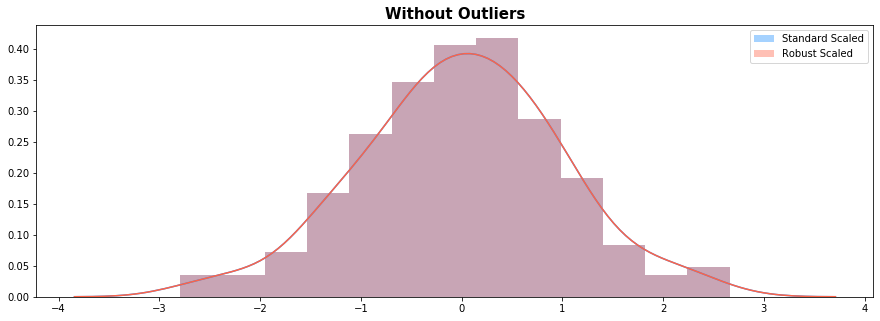

In [21]:
from sklearn.preprocessing import RobustScaler, StandardScaler

ss = StandardScaler()
rs = RobustScaler()

ss.fit(a)
rs.fit(a)

a_ss = ss.transform(a)
a_rs = rs.transform(a)


plt.figure(figsize=(15,5))
plt.title('Without Outliers',size=15, weight='bold')
sns.distplot(a_ss, color='dodgerblue', label='Standard Scaled')
sns.distplot(a_ss, color='tomato', label='Robust Scaled')
plt.legend(loc='upper right')
plt.show()

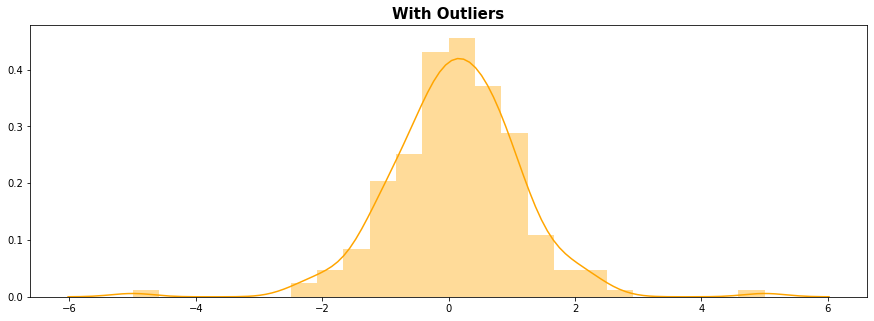

In [22]:
b = a.copy()
b[50] = 5
b[51] = -5

plt.figure(figsize=(15,5))
plt.title('With Outliers',size=15, weight='bold')
sns.distplot(b, color='orange')
plt.show()

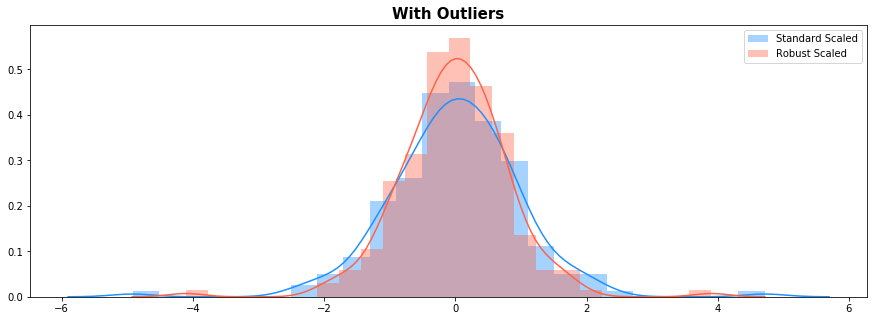

In [23]:
from sklearn.preprocessing import RobustScaler, StandardScaler

ss = StandardScaler()
rs = RobustScaler()

ss.fit(b)
rs.fit(b)

b_ss = ss.transform(b)
b_rs = rs.transform(b)

plt.figure(figsize=(15,5))
plt.title('With Outliers',size=15, weight='bold')
sns.distplot(b_ss, color='dodgerblue', label='Standard Scaled')
sns.distplot(b_rs, color='tomato',label='Robust Scaled')
plt.legend(loc='upper right')
plt.show()